In [ ]:
from k2400ser import *
brad = K2400ser('/dev/ttyUSB0')#, ilimit=1,vlimit=1,function=':SOURCE:FUNCTION VOLTAGE')

In [419]:
import serial, string, time, csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

keith=serial.Serial('/dev/ttyUSB0', baudrate = 57600)

In [396]:
def read(self):
    temp_read=str(self.read(self.in_waiting))
    pos_b=temp_read.find("b'")+2
    pos_r=temp_read.find("\\r'")
    
    return temp_read[pos_b:pos_r]
    

In [142]:
def write(self, command):
        self.write(('{0!s}\r'.format(command)).encode())

In [143]:
write(keith,"SOURCE:FUNCTION voltage")

In [144]:
write(keith,':SENSE:CURRENT:PROTECTION 1.0E-0')

In [163]:
write(keith,':SENSE:CURRENT:PROTECTION:LEVEL?')

In [164]:
read(keith)

b'1.000000E+00\r'

In [179]:
keith.in_waiting

0

In [180]:
keith.in_waiting

0

In [181]:
keith.read(keith.in_waiting)

b''

In [207]:
write(keith,':SOURCE:VOLTAGE {0!s}'.format(.1))
write(keith,':MEASURE:CURRENT?')
# write(keith,':MEASURE:RAD?')


In [195]:
write(keith,':OUTPUT ON')

In [198]:
write(keith,':MEASURE:READ')

In [214]:
write(keith,':OUTPUT OFF')

In [551]:
write(keith,':SOUR:VOLT:RANG .15')

In [208]:
write(keith,':READ?')

In [282]:
# write(keith,'*RST')
write(keith,':SOUR:FUNC VOLT')
write(keith,':SOUR:VOLT:MODE FIXED')
write(keith,':SOUR:VOLT:RANG 3')
write(keith,':SOUR:VOLT:LEV '+str(1.5))
write(keith,':SENS:CURR:PROT 10E-3')
write(keith,':SENS:FUNC "CURR"')
write(keith,':SENS:CURR:RANG 10E-3')
write(keith,':FORM:ELEM CURR')
write(keith,':OUTPUT ON')
write(keith,':READ?')
write(keith,':OUTPUT OFF')

In [400]:
read(keith)

'+1.003522E-04'

In [374]:
write(keith,':SOUR:VOLT:LEV '+str(0.1211))

In [367]:
write(keith,':OUTPUT ON')

In [372]:
write(keith,':READ?')

In [370]:
write(keith,':MEASURE:CURRENT?')

In [614]:
Vin=np.linspace(-2,2,100)
Iout=[]
write(keith,':SOUR:FUNC VOLT')
write(keith,':SOUR:VOLT:MODE FIXED')
write(keith,':SOUR:VOLT:RANG .5')
write(keith,':SENS:CURR:PROT 10E-1')
write(keith,':SENS:FUNC "CURR"')
write(keith,':SENS:CURR:RANG 10E-1')
write(keith,':FORM:ELEM CURR')
write(keith,':OUTPut ON')
read(keith)
for v in Vin:
#     print(str(v))
    
    write(keith,':SOUR:VOLT:LEV '+str(v))
#     time.sleep(1)
    write(keith,':READ?')
    time.sleep(.5)
    Iout.append(read(keith))
#     time.sleep(.5)
    
write(keith,':OUTPUT OFF')

In [615]:
Iout=[float(i) for i in Iout]

<IPython.core.display.Javascript object>


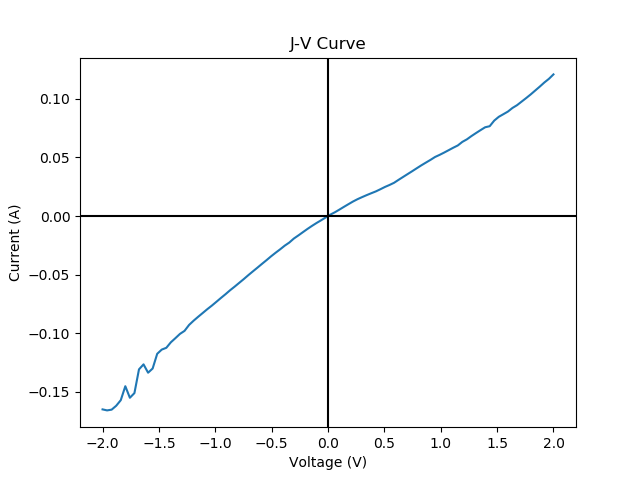

Text(0, 0.5, 'Current (A)')

In [616]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('J-V Curve')
ax.plot(Vin,Iout)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (A)')

In [509]:
Vin[1]/float(Iout[1])

10068.41589283339

In [510]:
Vin[0]/float(Iout[0])

-0.0

In [511]:
n=5
Vin[n]/float(Iout[n])

9974.482878919833

In [617]:

V=list(Vin)
V.insert(0,'V')
V
with open('jv_device2p2dark.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    
    V=list(Vin)
    V.insert(0,'V')
    I=list(Iout)
    I.insert(0,'I')
    spamwriter.writerow(V)
    spamwriter.writerow(Iout)



In [431]:
a=[(Vin[i], Iout[i]) for i in range(len(Iout))]

In [533]:
temp=list(Vin).insert(0,'V')
temp
a=None

In [542]:
a=list(Vin)

In [543]:
a.insert(0,'V')

In [544]:
a

['V',
 0.0,
 0.1111111111111111,
 0.2222222222222222,
 0.3333333333333333,
 0.4444444444444444,
 0.5555555555555556,
 0.6666666666666666,
 0.7777777777777777,
 0.8888888888888888,
 1.0]

In [474]:
c.extend([1, 2])

In [562]:
Iout

['-9.404010E-02',
 '-9.325577E-02',
 '-9.174712E-02',
 '-9.012598E-02',
 '-8.839934E-02',
 '-8.671160E-02',
 '-8.496688E-02',
 '-8.314601E-02',
 '-8.128849E-02',
 '-7.950284E-02',
 '-7.770754E-02',
 '-7.589940E-02',
 '-7.408451E-02',
 '-7.222687E-02',
 '-7.036502E-02',
 '-6.854186E-02',
 '-6.672127E-02',
 '-6.485385E-02',
 '-6.302589E-02',
 '-6.121307E-02',
 '-5.938043E-02',
 '-5.752924E-02',
 '-5.569560E-02',
 '-5.386540E-02',
 '-5.204662E-02',
 '-5.021899E-02',
 '-4.840621E-02',
 '-4.659544E-02',
 '-4.478412E-02',
 '-4.297141E-02',
 '-4.116474E-02',
 '-3.936588E-02',
 '-3.756579E-02',
 '-3.576708E-02',
 '-3.396973E-02',
 '-3.217757E-02',
 '-3.038801E-02',
 '-2.860457E-02',
 '-2.681722E-02',
 '-2.503894E-02',
 '-2.326548E-02',
 '-2.149510E-02',
 '-1.972601E-02',
 '-1.795846E-02',
 '-1.619365E-02',
 '-1.443052E-02',
 '-1.266967E-02',
 '-1.090925E-02',
 '-9.149536E-03',
 '-7.390227E-03',
 '-5.645151E-03',
 '-3.888398E-03',
 '-2.131625E-03',
 '-3.733832E-04',
 '+1.384394E-03',
 '+3.14049

In [477]:
d=['Vin']

In [478]:
d.extend([1, 2])

In [479]:
d

['Vin', 1, 2]

In [484]:
Iout.insert(0,'I')

In [485]:
Iout

['I',
 -1.145887e-07,
 1.103511e-05,
 2.217979e-05,
 3.340439e-05,
 4.453399e-05,
 5.570077e-05,
 6.682133e-05,
 7.805849e-05,
 8.918964e-05,
 0.0001003584]

In [491]:
Iout=Iout[1:0]

In [501]:
a = list(np.linspace(1,10,10))

In [502]:
a

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [505]:
a[1:]

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]